In [4]:
import datacube
from datacube.storage import masking

dc = datacube.Datacube()

In [5]:
query = { 
    'product' : 'LC08_scene'
    #, 'time' : ('2017-07-05','2017-08-23')
    #, 'latitude' : (47.7838, 49.93203)
    #, 'longitude' : (-124.35999, -121.14917)
    , 'measurements' : ['nir', 'quality']
    , 'resolution' : (-0.0025, 0.0025)
}

In [6]:
# Load data as an xarray.Dataset
data = dc.load(**query)

In [11]:
data.coords

Coordinates:
  * time       (time) datetime64[ns] 2013-08-09T15:58:49.866691 ...
  * latitude   (latitude) float64 47.14 47.14 47.13 47.13 47.13 47.13 47.12 ...
  * longitude  (longitude) float64 -79.19 -79.18 -79.18 -79.18 -79.18 -79.17 ...

In [12]:
# Isolate a band of interest as an xarray.DataArray
band = data.nir.loc[ data.coords['time'][0] : data.coords['time'][4]]

In [13]:
#Mask out all the invalid band data as a xarray.DataArray
band = band.where(band != band.attrs['nodata'])

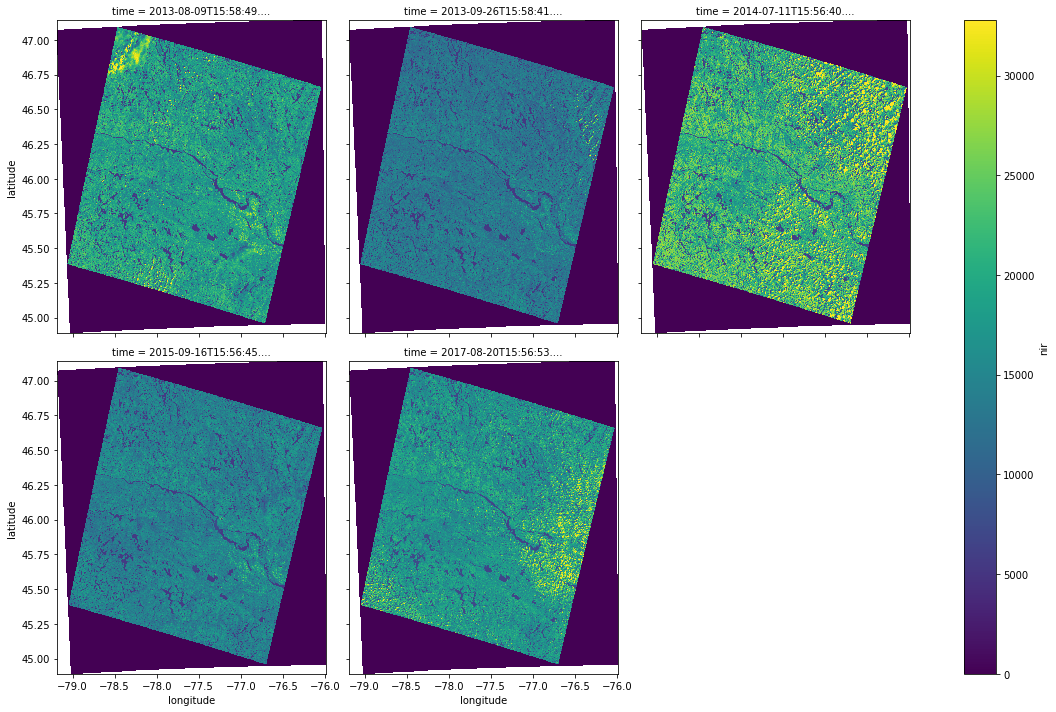

In [19]:
#Visualize the valid data using the plot function
band.plot(col='time', col_wrap = 3, size = 5)

In [15]:
# Use the masking library to see how the bit flags are defined in the dataset
import pandas
pandas.DataFrame.from_dict(masking.get_flags_def(data.quality), orient='index')

,bits,values,description
cirrus_confidence,"[11, 12]","{'0': 'Not Determined', '1': 'Low', '2': 'Medi...","Cirrus Confidence with low =(0-33)%, medium =(..."
cloud,[4],"{'0': False, '1': True}",Cloud
cloud_confidence,"[5, 6]","{'0': 'Not Determined', '1': 'Low', '2': 'Medi...","Cloud Confidence with low =(0-33)%, medium =(3..."
cloud_shadow_conf,"[7, 8]","{'0': 'Not Determined', '1': 'Low', '2': 'Medi...","Cloud Shadow Confidence with low =(0-33)%, med..."
designated_fill,[0],"{'0': False, '1': True}",Used to identify fill values
radiometric_saturation,"[2, 3]","{'0': 'none', '1': '1-2', '2': '3-4', '3': '<=5'}","Radiometric saturation bits, represents how ma..."
snow_ice_conf,"[9, 10]","{'0': 'Not Determined', '1': 'Low', '2': 'Medi...","Snow/Ice Confidence with low =(0-33)%, medium ..."
terrain_occlusion,[1],"{'0': False, '1': True}",Terrain Occlusion


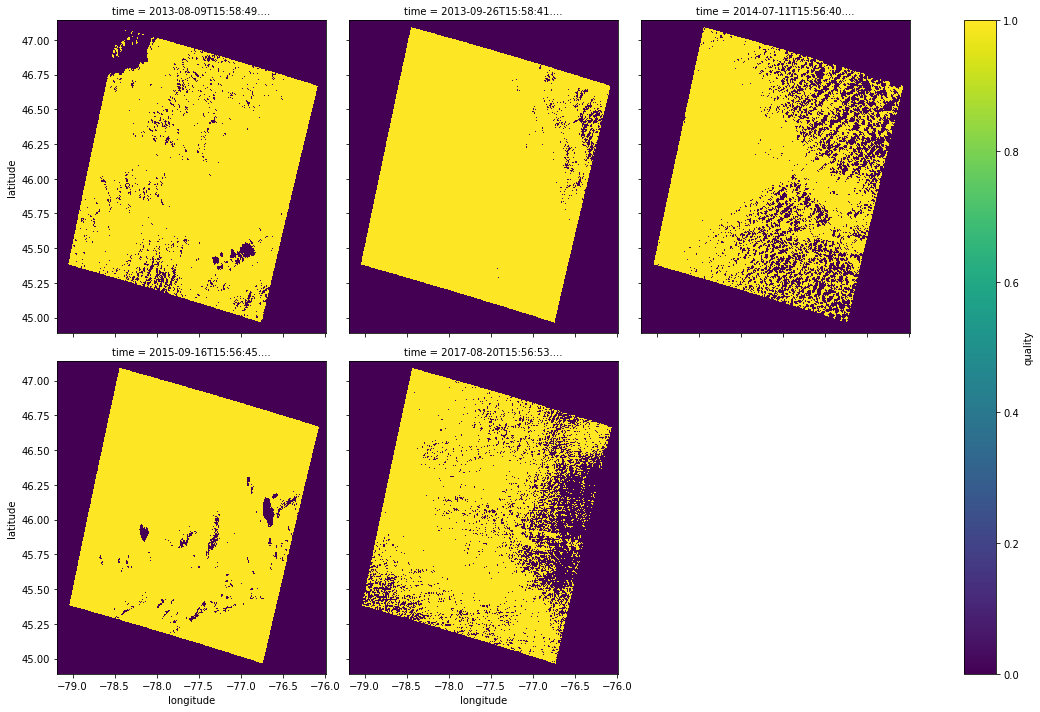

In [16]:
# Make a mask for the quality band
cloudFree = masking.make_mask(data, cloud = False, cloud_shadow_conf='Low', cloud_confidence='Low')
                              
#Visualize mask
cloudFree.quality.plot(col='time', col_wrap = 3, size = 5 )

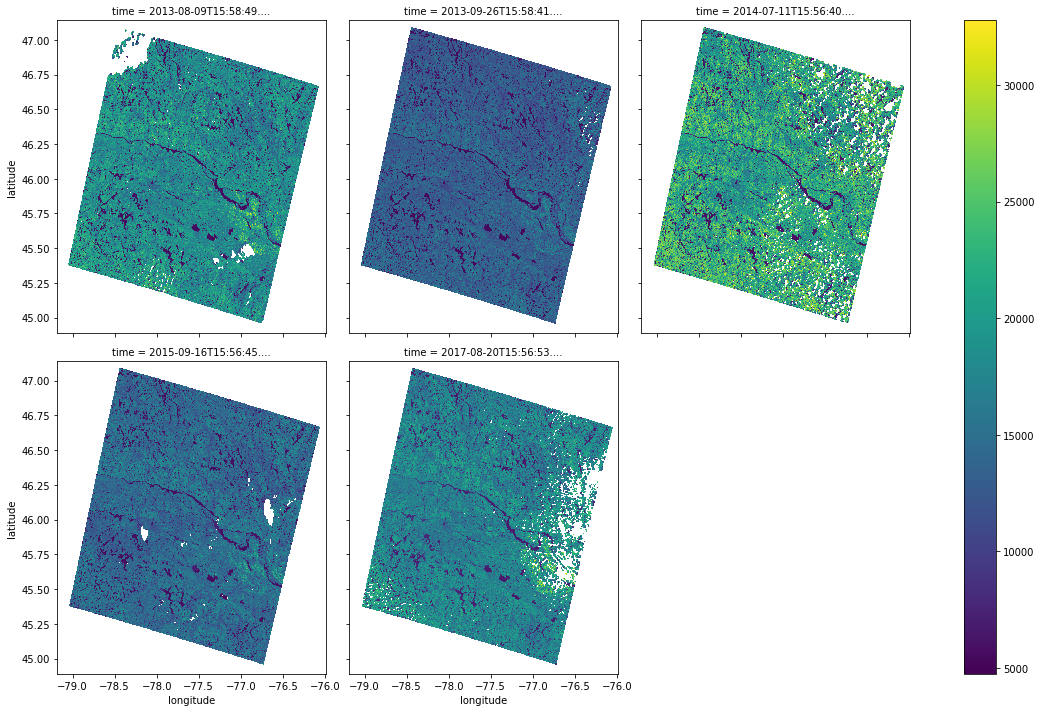

In [18]:
#  Combine the mask and the band info
cloudFreeData = band.where(cloudFree.quality)
cloudFreeData.plot(col='time', col_wrap = 3, size = 5)